## **1. Definicion de objetivo**

¿Como podriamos estimar que genero de juegos tiene mayores chances de lograr un alto nivel de ventas por region?<br>
¿Podremos hacer lo mismo, pero con las distintas plataformas?


## **2. Contexto comercial**

Una nueva empresa enfocada en el desarrollo de videojuegos, necesita saber que rumbo tomar a la hora del desarrollo de los mismos. Para eso necesita saber cuales son los generos de videojuegos que han tenido mayores volumenes de venta, y en que zona tuvieron mas exito. Tienen parametros como: genero, plataforma, puntaje dado por el publico, cantidad de usuarios, etc.
## **3. Problema comercial**<br>
La tarea es usar los datos disponibles y proporcionar visualizaciones que respondan a las preguntas que tiene la empresa:<br>
¿Cuales son los generos que han tenido  mas exito a nivel mundial, en terminos de ventas?<br>
Estos patrones, ¿se repiten en todas las regiones, o cada region tiene preferencias distintas?<br>
¿Se podria hacer lo mismo, pero con las plataformas?<br>

## **4. Contexto analitico**

Se le proporciona un archivo .CSV que contiene detalles sobre los juegos con datos de: nombre del juego, plataforma, fecha de lanzamiento, genero, ventas tanto a nivel global como regional (3 zonas geograficas), etc. Debe realizar las siguientes tareas con los datos:<br>
Leer, transformar y preparar datos para su visualización.<br>
Realizar análisis y construir visualizaciones de los datos para intentar contestar a las preguntas.


### Datos - Columnas de interes<br>
**Platform**: La plataforma para la que fue desarrollado el juego<br>
**Genre**: El genero al que corresponde el juego<br>
**Global_Sales**: El putnaje de ventas a nivel global<br>
**Eu_Sales**: El puntaje de ventas en la region de Europa<br>
**Na_Sales**: El puntaje de ventas en la region de NorteAmerica<br>
**JP_Sales**: El puntaje de ventas en la region de Japon

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.formula.api as sm
from sklearn.impute import SimpleImputer

In [3]:
file_data = 'VideoGamesSales.csv'
df = pd.read_csv (file_data, sep=',')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
sum_df = df.groupby(['Genre'])['Global_Sales'].sum()
sum_df

Genre
Action          1745.27
Adventure        237.69
Fighting         447.48
Misc             803.18
Platform         828.08
Puzzle           243.02
Racing           728.90
Role-Playing     934.40
Shooter         1052.94
Simulation       390.42
Sports          1332.00
Strategy         174.50
Name: Global_Sales, dtype: float64

<AxesSubplot: xlabel='Genre'>

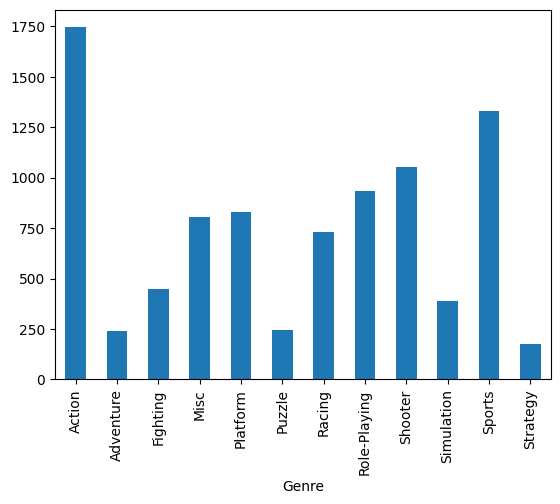

In [11]:
sum_df.plot.bar()

### Con este grafico podemos ver que los generos con mas volumen de ventas a nivel mundial, son: Accion, Deportes y Shooters.

In [12]:
df_n=df[['Genre','NA_Sales','EU_Sales','JP_Sales']].groupby(by=['Genre']).sum().reset_index()
df_n.head()

,Genre,NA_Sales,EU_Sales,JP_Sales
0,Action,879.01,519.13,161.44
1,Adventure,105.26,63.54,52.30
2,Fighting,223.36,100.33,87.48
3,Misc,407.27,212.74,108.11
4,Platform,445.50,200.35,130.83


Text(0.5, 1.0, 'NA sales by genre')

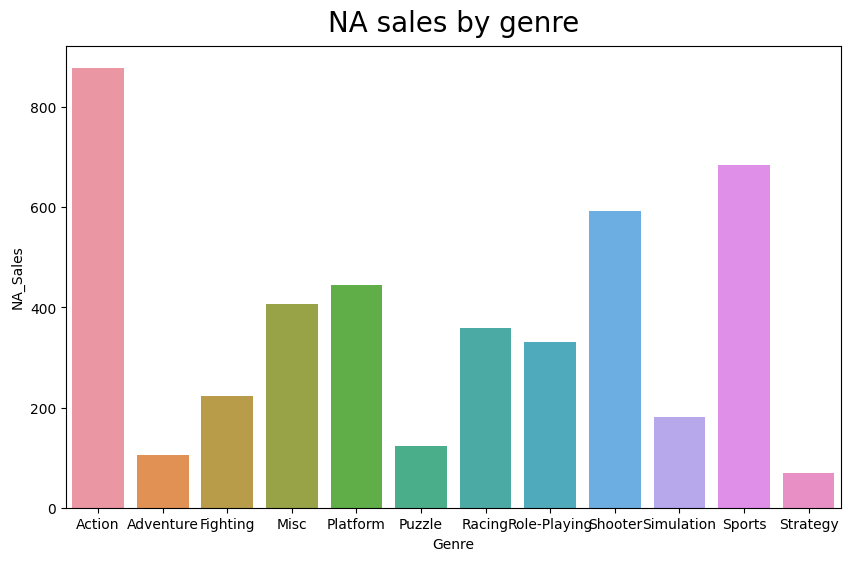

In [13]:
plt.figure(figsize=(10,6))
sns.barplot(y='NA_Sales',x='Genre',data=df_n);
plt.title("NA sales by genre", fontsize=20, verticalalignment='bottom')

Podemos ver como en la region de Norteamerica, los 3 generos mas populares son: Accion, Deportes y Shooter. Mientras que los 3 menos populares son: Puzzle, Aventura y Estrategia. Siguiendo los mismos patrones que teniamos con los datos de ventas a nivel mundial.

Text(0.5, 1.0, 'EU sales by genre')

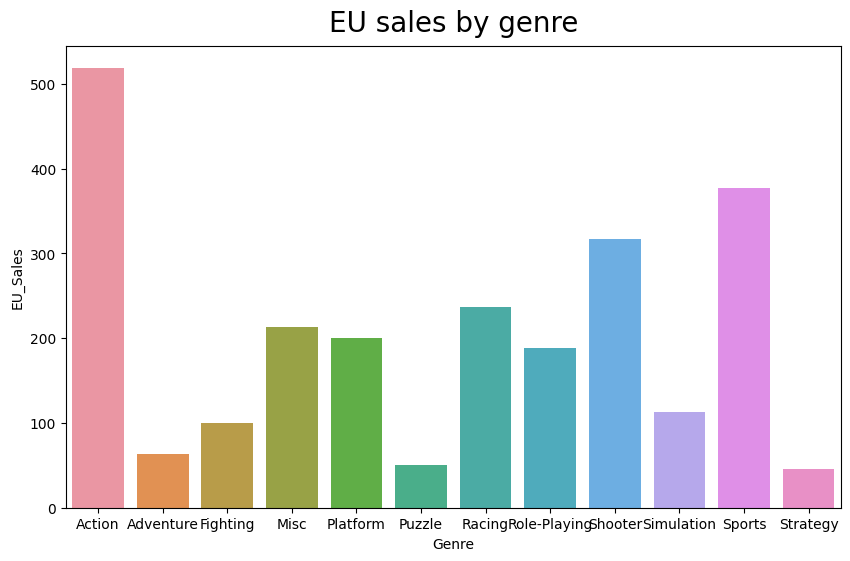

In [14]:
plt.figure(figsize=(10,6))
sns.barplot(y='EU_Sales',x='Genre',data=df_n);
plt.title("EU sales by genre", fontsize=20, verticalalignment='bottom')

En la region de Europa, se repite casi el mismo patron que en Norteamerica. El top 3 y el bottom 3, se conforman por los mismos generos.

Text(0.5, 1.0, 'JP sales by genre')

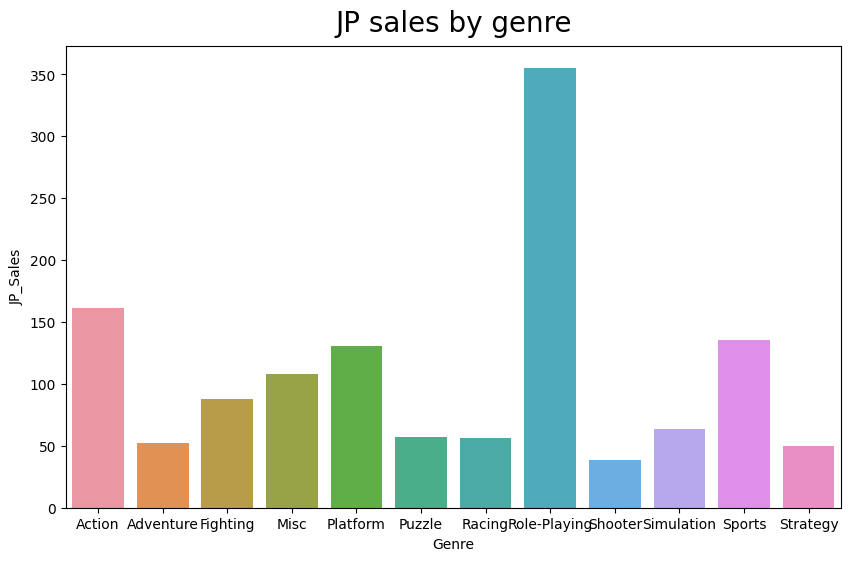

In [15]:
plt.figure(figsize=(10,6))
sns.barplot(y='JP_Sales',x='Genre',data=df_n);
plt.title("JP sales by genre", fontsize=20, verticalalignment='bottom')

Sin embargo en la region de Japon, esto cambia. En el top 3 tenemos las categorias de: RPG, primera por amplia diferencia, Accion y Deportes. Mientras las 3 menos populares, son las mismas que en las otras regiones. 

Quizas las categorias menos populares, puedan deberse al volumen de juegos que tienen, haciendo que no puedan sumar una gran cantidad de ventas. Con esto podriamos decir, que las empresas o desarrolladores que se enfoquen en el desarrollo de juegos de RPG, podrian enfocar su campaña de marketing en la region de Japon, siendo esta la que mas juegos de esta categoria consume.

<AxesSubplot: xlabel='Platform'>

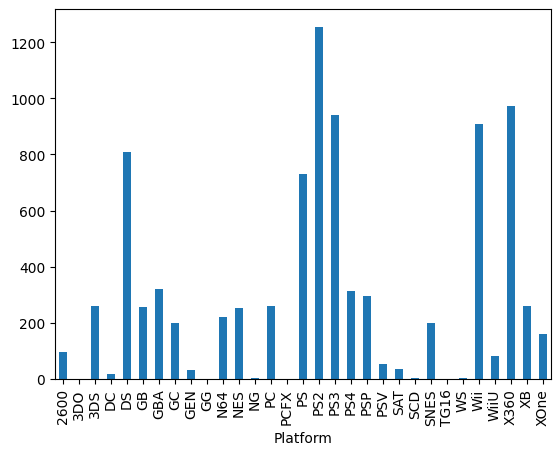

In [17]:
df_p= df.groupby(['Platform'])['Global_Sales'].sum()
df_p.plot.bar()

En este grafico vemos que las plataformas mas exitosas a nivel mundial, son: PS2, X360 y Wii.

In [19]:
df_p=df[['Platform','NA_Sales','EU_Sales','JP_Sales']].groupby(by=['Platform']).sum().reset_index()
df_p.head()

,Platform,NA_Sales,EU_Sales,JP_Sales
0,2600,90.60,5.47,0.00
1,3DO,0.00,0.00,0.10
2,3DS,83.49,61.48,100.67
3,DC,5.43,1.69,8.56
4,DS,382.67,188.89,175.57


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '2600'),
  Text(1, 0, '3DO'),
  Text(2, 0, '3DS'),
  Text(3, 0, 'DC'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'GB'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'GC'),
  Text(8, 0, 'GEN'),
  Text(9, 0, 'GG'),
  Text(10, 0, 'N64'),
  Text(11, 0, 'NES'),
  Text(12, 0, 'NG'),
  Text(13, 0, 'PC'),
  Text(14, 0, 'PCFX'),
  Text(15, 0, 'PS'),
  Text(16, 0, 'PS2'),
  Text(17, 0, 'PS3'),
  Text(18, 0, 'PS4'),
  Text(19, 0, 'PSP'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'SCD'),
  Text(23, 0, 'SNES'),
  Text(24, 0, 'TG16'),
  Text(25, 0, 'WS'),
  Text(26, 0, 'Wii'),
  Text(27, 0, 'WiiU'),
  Text(28, 0, 'X360'),
  Text(29, 0, 'XB'),
  Text(30, 0, 'XOne')])

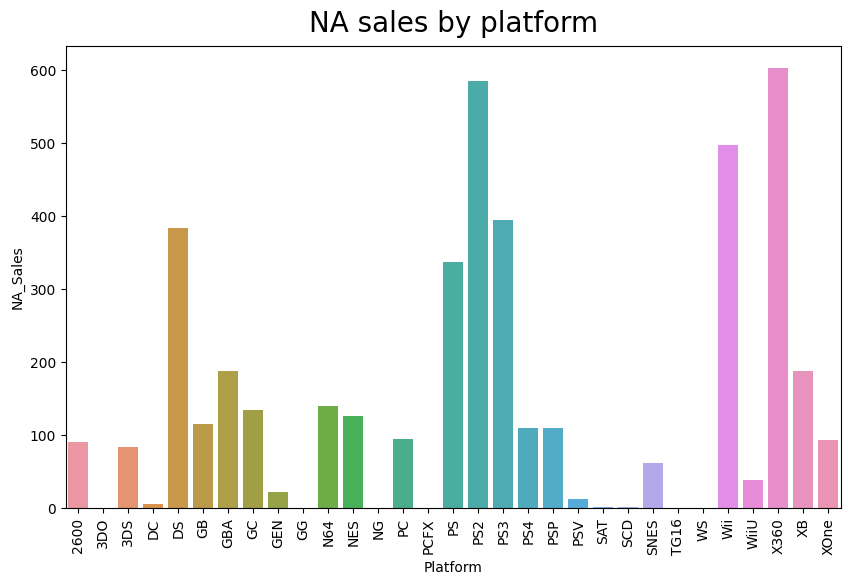

In [20]:
plt.figure(figsize=(10,6))
sns.barplot(y='NA_Sales',x='Platform',data=df_p);
plt.title("NA sales by platform", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90)

Ahora vemos cuales son las plataformas predominantes de cada region. En Norteamerica las plataformas con mas volumen de ventas son: X360, PS2 y Wii. Similar a los datos que teniamos de ventas a nivel global.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '2600'),
  Text(1, 0, '3DO'),
  Text(2, 0, '3DS'),
  Text(3, 0, 'DC'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'GB'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'GC'),
  Text(8, 0, 'GEN'),
  Text(9, 0, 'GG'),
  Text(10, 0, 'N64'),
  Text(11, 0, 'NES'),
  Text(12, 0, 'NG'),
  Text(13, 0, 'PC'),
  Text(14, 0, 'PCFX'),
  Text(15, 0, 'PS'),
  Text(16, 0, 'PS2'),
  Text(17, 0, 'PS3'),
  Text(18, 0, 'PS4'),
  Text(19, 0, 'PSP'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'SCD'),
  Text(23, 0, 'SNES'),
  Text(24, 0, 'TG16'),
  Text(25, 0, 'WS'),
  Text(26, 0, 'Wii'),
  Text(27, 0, 'WiiU'),
  Text(28, 0, 'X360'),
  Text(29, 0, 'XB'),
  Text(30, 0, 'XOne')])

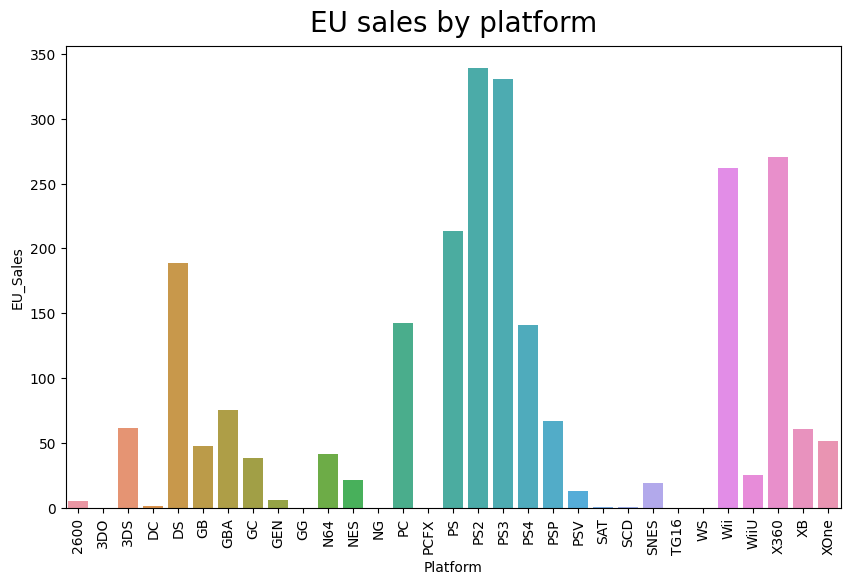

In [21]:
plt.figure(figsize=(10,6))
sns.barplot(y='EU_Sales',x='Platform',data=df_p);
plt.title("EU sales by platform", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90)

En Europa, la PS2 y la X360 siguen en el podio, y se suma la PS3.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(0, 0, '2600'),
  Text(1, 0, '3DO'),
  Text(2, 0, '3DS'),
  Text(3, 0, 'DC'),
  Text(4, 0, 'DS'),
  Text(5, 0, 'GB'),
  Text(6, 0, 'GBA'),
  Text(7, 0, 'GC'),
  Text(8, 0, 'GEN'),
  Text(9, 0, 'GG'),
  Text(10, 0, 'N64'),
  Text(11, 0, 'NES'),
  Text(12, 0, 'NG'),
  Text(13, 0, 'PC'),
  Text(14, 0, 'PCFX'),
  Text(15, 0, 'PS'),
  Text(16, 0, 'PS2'),
  Text(17, 0, 'PS3'),
  Text(18, 0, 'PS4'),
  Text(19, 0, 'PSP'),
  Text(20, 0, 'PSV'),
  Text(21, 0, 'SAT'),
  Text(22, 0, 'SCD'),
  Text(23, 0, 'SNES'),
  Text(24, 0, 'TG16'),
  Text(25, 0, 'WS'),
  Text(26, 0, 'Wii'),
  Text(27, 0, 'WiiU'),
  Text(28, 0, 'X360'),
  Text(29, 0, 'XB'),
  Text(30, 0, 'XOne')])

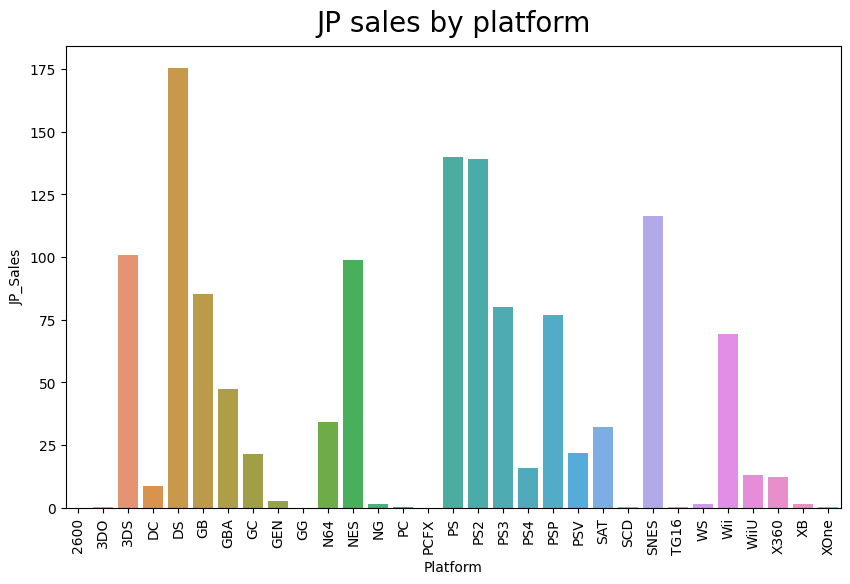

In [22]:
plt.figure(figsize=(10,6))
sns.barplot(y='JP_Sales',x='Platform',data=df_p);
plt.title("JP sales by platform", fontsize=20, verticalalignment='bottom')
plt.xticks(rotation=90)

En Japon en cambio, la plataforma mas popular es la DS, seguida por la PS y PS2. Tambien se puede ver como la SNES, tiene mucha popularidad, mientras que en las otras regiones, casi no aparecia.

## **Interpretacion de resultados y conclusiones**<br>
Podemos ver como las regiones de Europa y Norteamerica tienen preferencias similares en cuanto al genero de los juegos. Mientras que la region de Japon tienen una alta inclinacion por los juegos de tipo RPG. En los graficos comparativos de ventas por region, tambien podemos ver que la region de Norteamerica es la zona en donde mas ventas se realizaron, mientras que japon es la que menos tiene a nivel general.

Con respecto a las plataformas vemos patrones muy similares a los datos que obtuvimos analizando los generos de los juegos. Mientras que Europa y Norteamerica tienen datos muy parecidos, la region de Japon, se inclina por otras plataformas.

Como nota final, podriamos sugerirle a nuestro cliente que esta indeciso sobre que genero y en que region desarrollar su nuevo juego, que podria optar por un juego de Accion para comercializarlo en Europa o en Norteamerica. Y en el caso de querer apuntar al publico japones, un juego del estilo RPG. Tambien por lo que pudimos ver, en terminos generales la plataforma con mas aceptacion a nuvel global, es la PS2